In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_excel('./data/online_retail_II.xlsx')

In [9]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [11]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day

In [13]:
df['Total_Amount'] = df['Quantity'] * df['Price']
df['Total_Amount']

0          83.40
1          81.00
2          81.00
3         100.80
4          30.00
           ...  
525456      5.90
525457      3.75
525458      3.75
525459      7.50
525460      3.90
Name: Total_Amount, Length: 525461, dtype: float64

In [17]:
df['Invoice'] = pd.to_numeric(df['Invoice'], errors = 'coerce').astype('Int64')

In [18]:
df.groupby('Invoice')['Total_Amount'].sum().nlargest(10)

Invoice
533027    49844.99
531516    45332.97
493819    44051.60
524181    33167.80
526934    26007.08
512771    25111.09
515944    22863.36
503061    22853.77
517731    21984.00
495591    18570.88
Name: Total_Amount, dtype: float64

In [20]:
df.shape

(525461, 12)

In [21]:
df.groupby('Description')['Quantity'].sum().nlargest()

Description
WHITE HANGING HEART T-LIGHT HOLDER    57733
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54698
BROCADE RING PURSE                    47647
PACK OF 72 RETRO SPOT CAKE CASES      46106
ASSORTED COLOUR BIRD ORNAMENT         44925
Name: Quantity, dtype: int64

In [27]:
df['Total_Amount']

0          83.40
1          81.00
2          81.00
3         100.80
4          30.00
           ...  
525456      5.90
525457      3.75
525458      3.75
525459      7.50
525460      3.90
Name: Total_Amount, Length: 525461, dtype: float64

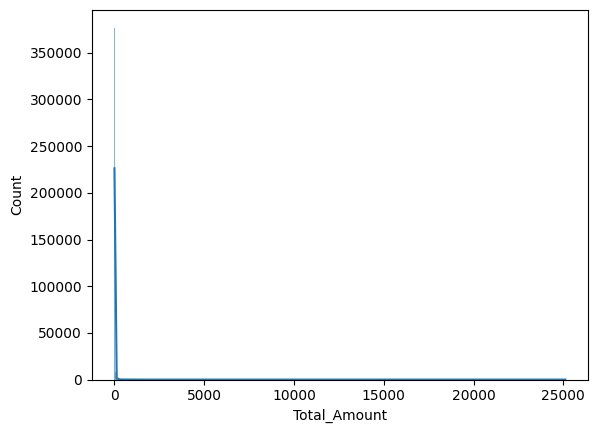

In [30]:
sns.histplot(df[df['Total_Amount'] > 0]['Total_Amount'], kde=True)
plt.show()

In [32]:
df['Hour'] = df['InvoiceDate'].dt.hour
df['Hour'].value_counts()

Hour
12    81136
13    78049
14    74042
11    64106
15    57790
10    44211
16    39539
9     33992
17    29040
18     9017
8      7076
19     5384
20     1334
7       744
21        1
Name: count, dtype: int64

In [33]:
df.groupby('Invoice')['Quantity'].sum().mean()

np.float64(233.08104537384915)

In [36]:
df['Customer ID'] = pd.to_numeric(df['Customer ID']).astype('Int64')

In [37]:
df.groupby('Customer ID')['Total_Amount'].sum().nlargest(10)

Customer ID
18102    341776.73
14646    243853.05
14156    183180.55
14911    137675.91
13694    128172.42
17511     83760.60
15061     82162.74
16684     75610.17
13089     55828.31
16754     54558.18
Name: Total_Amount, dtype: float64

In [39]:
df.groupby('Country')['StockCode'].nunique().sort_values(ascending=False).head()

Country
United Kingdom    4631
EIRE              2054
Germany           1461
France            1301
Netherlands        881
Name: StockCode, dtype: int64

In [41]:
cancelled = df[df['Quantity'] < 0]
cancelled['Total_Amount'].sum()

np.float64(-630228.9400000001)

<Axes: xlabel='Year,Month'>

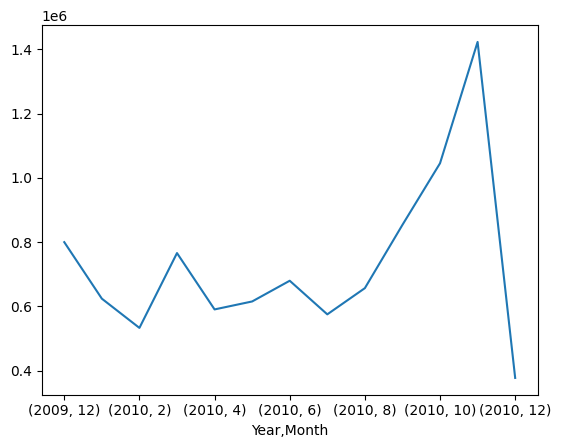

In [42]:
monthly = df.groupby(['Year', 'Month'])['Total_Amount'].sum()
monthly.plot(kind='line')

In [43]:
df['Category'] = df['Description'].str.extract('(BAG|SHIRT|TOY|BOOK)', expand=False)
df.groupby('Category')['Total_Amount'].sum().sort_values(ascending=False)

Category
BAG      858659.42
BOOK      67855.42
TOY       39646.57
SHIRT       977.02
Name: Total_Amount, dtype: float64

In [46]:
pivote = pd.pivot_table(df,
                        values='Total_Amount',
                        index='Country',
                        columns='Month',
                        aggfunc='sum'
                        )
pivote.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Country,,,,,,,,,,,,
Australia,NaN,1029.66,429.39,630.95,1312.70,3189.28,633.62,176.00,785.83,2989.15,18207.82,667.40
Austria,NaN,1118.86,925.13,1388.54,582.04,268.10,NaN,1043.15,1589.12,1236.70,2873.30,1998.34
Bahrain,NaN,439.85,506.30,NaN,585.96,463.28,NaN,NaN,NaN,317.76,NaN,NaN
Belgium,1624.07,1700.35,904.02,2549.14,84.95,3535.39,1914.23,1713.62,1190.06,1475.72,5178.28,793.70
Bermuda,NaN,NaN,1253.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
